# Robot Path Planning and PID Control
***
# Table of Contents
1.  [Setup](#Setup)
2.  [Path Planning](#Path-Planning)
3.  [Path Smoothing](#Path-Smoothing)
4.  [PID Control](#PID-Control)


# Setup


This allowed me to split my code in several cells
making it easier to explain and mark which part of the assignment where.

For this I will mark each code cell by a quoted text, featuring which exercises where tackled.

Example:

> a(i)

```
grid = [[   .
            .
            .   ]]
```

Some code cells will have an md cell above it with the sub heading **Code Explanation** and some code cells will have one
beneath them with the sub heading **Comments**. These md cells will have code explanations and comments about the code
and/or results.

I am using python 3.7.

An html file generated by the Jupyter Notebook is attached for more readability.

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
%matplotlib inline

## Comments

I will be using matplotlib to draw the environment to better visualize and explain what is going on.

# Path Planning

In [2]:
grid = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
start = (3, 0)
goal = (5, 9)
cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

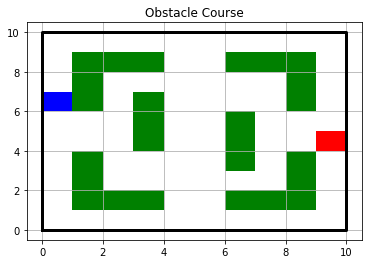

In [3]:
# Plot the grid with obstacles
def drawEnv():
    obstacles = [plt.Rectangle((1,1), 3, 1, fc='green'),
                 plt.Rectangle((1,1), 1, 3, fc='green'),
                 plt.Rectangle((6,1), 3, 1, fc='green'),
                 plt.Rectangle((8,1), 1, 3, fc='green'),
                 plt.Rectangle((3,4), 1, 3, fc='green'),
                 plt.Rectangle((6,3), 1, 3, fc='green'),
                 plt.Rectangle((1,6), 1, 3, fc='green'),
                 plt.Rectangle((1,8), 3, 1, fc='green'),
                 plt.Rectangle((8,6), 1, 3, fc='green'),
                 plt.Rectangle((6,8), 3, 1, fc='green'),]
    for obstacle in obstacles:
        plt.gca().add_patch(obstacle)
    # Start
    plt.gca().add_patch(plt.Rectangle((0,6), 1, 1, fc='blue'))
    # Goal
    plt.gca().add_patch(plt.Rectangle((9,4), 1, 1, fc='red'))

    plt.title("Obstacle Course")
    x_bounds = [0, 10, 10, 0, 0]
    y_bounds = [0, 0, 10, 10, 0]
    plt.plot(x_bounds, y_bounds, linewidth=3, color='black')
    plt.grid()
drawEnv()
plt.show()

In [4]:
def ManhattanDistance(grid, goal):
    heuristic = [[99 for x in range(len(grid))] for y in range(len(grid))]
    for x in range(len(grid)):
        for y in range(len(grid[0])):
            heuristic[x][y] = abs(x - goal[0]) + abs(y - goal[1])

    return heuristic

def ManhattanDistanceWithObstacles(grid, goal):
    heuristic = [[20 for x in range(len(grid))] for y in range(len(grid))]
    for x in range(len(grid)):
        for y in range(len(grid[0])):
            if not grid[x][y]:
                heuristic[x][y] = abs(x - goal[0]) + abs(y - goal[1])

    return heuristic


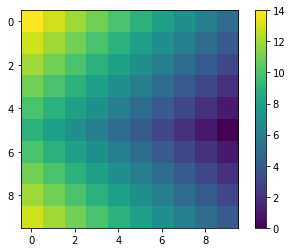

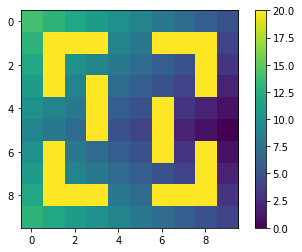

In [5]:
plt.imshow(ManhattanDistance(grid, goal), interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

plt.imshow(ManhattanDistanceWithObstacles(grid, goal), interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

In [11]:
ManhattanDistance(grid, goal)

[[14, 13, 12, 11, 10, 9, 8, 7, 6, 5],
 [13, 12, 11, 10, 9, 8, 7, 6, 5, 4],
 [12, 11, 10, 9, 8, 7, 6, 5, 4, 3],
 [11, 10, 9, 8, 7, 6, 5, 4, 3, 2],
 [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [9, 8, 7, 6, 5, 4, 3, 2, 1, 0],
 [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [11, 10, 9, 8, 7, 6, 5, 4, 3, 2],
 [12, 11, 10, 9, 8, 7, 6, 5, 4, 3],
 [13, 12, 11, 10, 9, 8, 7, 6, 5, 4]]

In [13]:
def A_Star(grid, init, goal, cost,heuristic):
    current = [init[0], init[1]]
    route = [[' ' for r in range(len(grid))] for c in range(len(grid))]
    while True:
        neighbours = {}
        for i, d in enumerate(delta):
            x2 = current[0] + d[0]
            y2 = current[1] + d[1]
            if 0 <= x2 < len(grid) and 0 <= y2 < len(grid[0]) and grid[x2][y2] == 0:
                neighbours[(x2, y2, i)] = (heuristic[x2][y2])
        closestV = 100
        closestP = ()
        for neighbour in neighbours:
            if neighbours[neighbour] < closestV and route[neighbour[0]][neighbour[1]] is ' ':
                closestV = neighbours[neighbour]
                closestP = neighbour
        if closestP[0] == goal[0] and closestP[1] == goal[1]:
            route[closestP[0]][closestP[1]] = '*'
            return route
        else:
            current = [closestP[0], closestP[1]]
            route[closestP[0]][closestP[1]] = delta_name[closestP[2]]
            # if route[closestP[0]][closestP[1]] is not ' ':
            #     route[closestP[0]][closestP[1]] = '%'

A_Star(grid,start,goal, cost, ManhattanDistanceWithObstacles(grid, goal))

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', '^', '>', '>', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', '^', ' ', 'v', '^', '>', '>', ' ', ' '],
 ['v', ' ', '^', ' ', 'v', '^', ' ', 'v', ' ', ' '],
 ['v', '>', '>', ' ', 'v', '>', ' ', 'v', '>', '*'],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']]